In [1]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt

We will start comparing characters from both universes with this notebook.

In [2]:
# Read in the characters from Star Trek

stc = pd.read_parquet('../WPscraped/StarTrek_Characters.parquet')

# Read in the characters from Star Wars

swc = pd.read_parquet('../WPscraped/StarWars_Characters.parquet')

In [3]:
# view stc
stc.head()

,name,gender,height,weight,bloodType,maritalStatus
0,0413 Theta,None,NaN,NaN,None,None
1,0718,M,NaN,NaN,None,None
2,10111,None,NaN,NaN,None,None
3,335,None,NaN,NaN,None,None
4,355,None,NaN,NaN,None,None


In [5]:
# view stc info
stc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7571 entries, 0 to 7570
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7571 non-null   object 
 1   gender         1146 non-null   object 
 2   height         66 non-null     float64
 3   weight         49 non-null     float64
 4   bloodType      9 non-null      object 
 5   maritalStatus  366 non-null    object 
dtypes: float64(2), object(4)
memory usage: 355.0+ KB


In [4]:
# view swc
swc.head()

,name,key,url,description,species_2nd,species_3rd,species,home_world,gender,height,eye_color,skin_color,hair_color,weight
0,"\n\t\t\t\t\t""Muse""\t\t\t\t",Muse,https://starwars.fandom.com/wiki/%22Muse%22,"""Muse"" was the callsign of a human pilot who f...",None,None,Human,None,None,NaN,None,None,None,None
1,\n\t\t\t\t\t1138 (First Order),1138_(First_Order),https://starwars.fandom.com/wiki/1138_(First_O...,1138 was a human stormtrooper who served in th...,None,None,Human,None,None,NaN,None,None,None,None
2,\n\t\t\t\t\t1151\t\t\t\t,1151,https://starwars.fandom.com/wiki/1151,1151 was a clone cadet who was a part of the C...,None,None,Human,Kamino,Male,NaN,Brown,Tan,Black,None
3,\n\t\t\t\t\t1174\t\t\t\t,1174,https://starwars.fandom.com/wiki/1174,"1174, nicknamed ""Whiplash,"" was a clone troope...",None,None,Human,Kamino,Male,NaN,Brown,Tan,Black,None
4,\n\t\t\t\t\t224 (Coruscant Security Force),224_(Coruscant_Security_Force),https://starwars.fandom.com/wiki/224_(Coruscan...,\n\n\n\n\n\n\n224\n\n\nBiographical informatio...,None,None,Human,None,Male,NaN,None,Light,None,None


In [6]:
# view swc info
swc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7258 non-null   object 
 1   key          7258 non-null   object 
 2   url          7258 non-null   object 
 3   description  7258 non-null   object 
 4   species_2nd  18 non-null     object 
 5   species_3rd  6 non-null      object 
 6   species      7258 non-null   object 
 7   home_world   2066 non-null   object 
 8   gender       7258 non-null   object 
 9   height       505 non-null    float64
 10  eye_color    3086 non-null   object 
 11  skin_color   3960 non-null   object 
 12  hair_color   2614 non-null   object 
 13  weight       80 non-null     object 
dtypes: float64(1), object(13)
memory usage: 794.0+ KB


The first thing to notice is there is more information available on Wookieepedia than STAPI.  However, there is more useful and complete information on STAPI.  We will clean up the Character dataframes for both to be: Name, Gender, Height, and Weight. We may still keep the some of the other information not found in both for information purposes.

In [7]:
# Update swc dataframe to have Name, Gender, Height, and Weight
swc_updated = swc[['name', 'gender', 'height', 'weight']]

# Test swc_updated
swc_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    7258 non-null   object 
 1   gender  7258 non-null   object 
 2   height  505 non-null    float64
 3   weight  80 non-null     object 
dtypes: float64(1), object(3)
memory usage: 226.9+ KB


In [8]:
# Update stc dataframe to have Name, Gender, Height, and Weight
stc_updated = stc[['name', 'gender', 'height', 'weight']]

# Test stc_updated
stc_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7571 entries, 0 to 7570
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    7571 non-null   object 
 1   gender  1146 non-null   object 
 2   height  66 non-null     float64
 3   weight  49 non-null     float64
dtypes: float64(2), object(2)
memory usage: 236.7+ KB


At first glance, we can see there are 7258 Star Wars Characters and 7571 Star Trek Characters.  

It appears Star Wars has the gender for all characters, but we will check to verify because they may contain "None" or "Null" values. Star Trek has 1146 of its characters' genders, but we will look into them as well.

Star Wars has the height listed for 505 of its characters compared to only 66 for Star Trek.

Star Wars has the weight listed for 80 of its characters compared to only 49 for Star Trek.

Let's delve into this more to see what we come up with.

In [9]:
# View the count of genders in Star Wars
sw_genders = swc_updated['gender'].value_counts()

sw_genders

Male          4057
Female        1752
None          1432
Non-binary      17
Name: gender, dtype: int64

In [10]:
# View the count of genders in Star Trek
st_genders = stc_updated['gender'].value_counts()

st_genders

M    786
F    360
Name: gender, dtype: int64

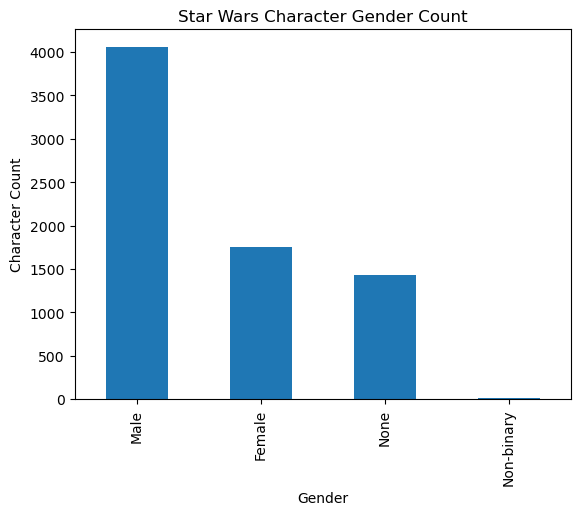

In [11]:
# create a graph showing count of character genders for Star Wars

sw_genders.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Character Count')
plt.title('Star Wars Character Gender Count')
plt.show()



In [18]:
# Calculate percentages of genders for Star Wars

# Male Star Wars Characters
sw_male = sw_genders['Male']/ sum(sw_genders) * 100

# Female Star Wars Characters
sw_female = sw_genders['Female']/ sum(sw_genders) * 100

# Non-Binary Star Wars Characters
sw_nb = sw_genders['Non-binary']/ sum(sw_genders) * 100

# Unclassified Star Wars Characters
sw_un = sw_genders['None']/ sum(sw_genders) * 100


print(f'Male: {sw_male:.1f}%')
print(f'Female: {sw_female:.1f}%')
print(f'Non-binary: {sw_nb:.1f}%')
print(f'Unclassified: {sw_un: .1f}%')


Male: 55.9%
Female: 24.1%
Non-binary: 0.2%
Unclassified:  19.7%


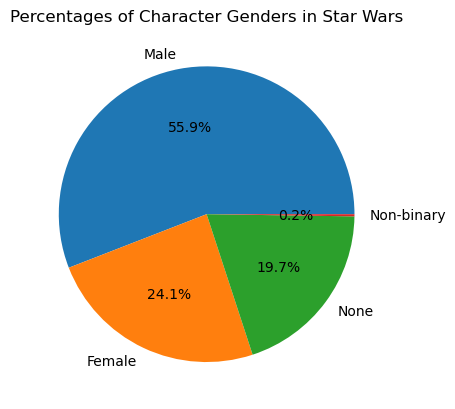

In [21]:
# create a pie chart showing percentages
sw_percent = sw_genders / sum(sw_genders) * 100

fig, ax = plt.subplots()
ax.pie(sw_percent, labels=sw_percent.index, autopct='%1.1f%%')
plt.title('Percentages of Character Genders in Star Wars')
# Show the plot
plt.show()


On first look for genders for characters, Star Wars has more female characters than Star Trek, accounting for 24% of the Star Wars character population.  Star Trek only has 4.75% female population for its characters.  However, Star Wars male characters make up 55.9% of it's population while Star Trek males only make up 10% or their characters. It is interesting to note that Star Wars has stated non-binary characters (0.23%) of their population, while Star Trek has no listed non-binary characters.   For characters that do not have genders listed, 20% are not listed for Star Wars, but 84.8% of Star Trek characters are unclassified.